<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-05-09 20:07:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  57.1MB/s    in 2.7s    

2025-05-09 20:07:08 (57.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [15]:
def convert_age_to_numeric(age_str):
    if age_str == 'Under 18 years old':
        return 18
    elif age_str == '18-24 years old':
        return 20
    elif age_str == '25-34 years old':
        return 30
    elif age_str == '35-44 years old':
        return 40
    elif age_str == '45-54 years old':
        return 50
    elif age_str == '55-64 years old':
        return 60
    elif age_str == '65 years or older':
        return 65
    else:
        return None

# Age
df['Age_numeric'] = df['Age'].apply(convert_age_to_numeric)
df['Age_numeric'].fillna(df['Age_numeric'].mean(), inplace=True)
pd.concat([df['Age'], df['Age_numeric']], axis=1).head(10)

df['Age_numeric']

/tmp/ipykernel_988/545146924.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age_numeric'].fillna(df['Age_numeric'].mean(), inplace=True)


0        18.0
1        40.0
2        50.0
3        20.0
4        20.0
         ... 
65432    20.0
65433    30.0
65434    30.0
65435    20.0
65436    20.0
Name: Age_numeric, Length: 65437, dtype: float64

### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


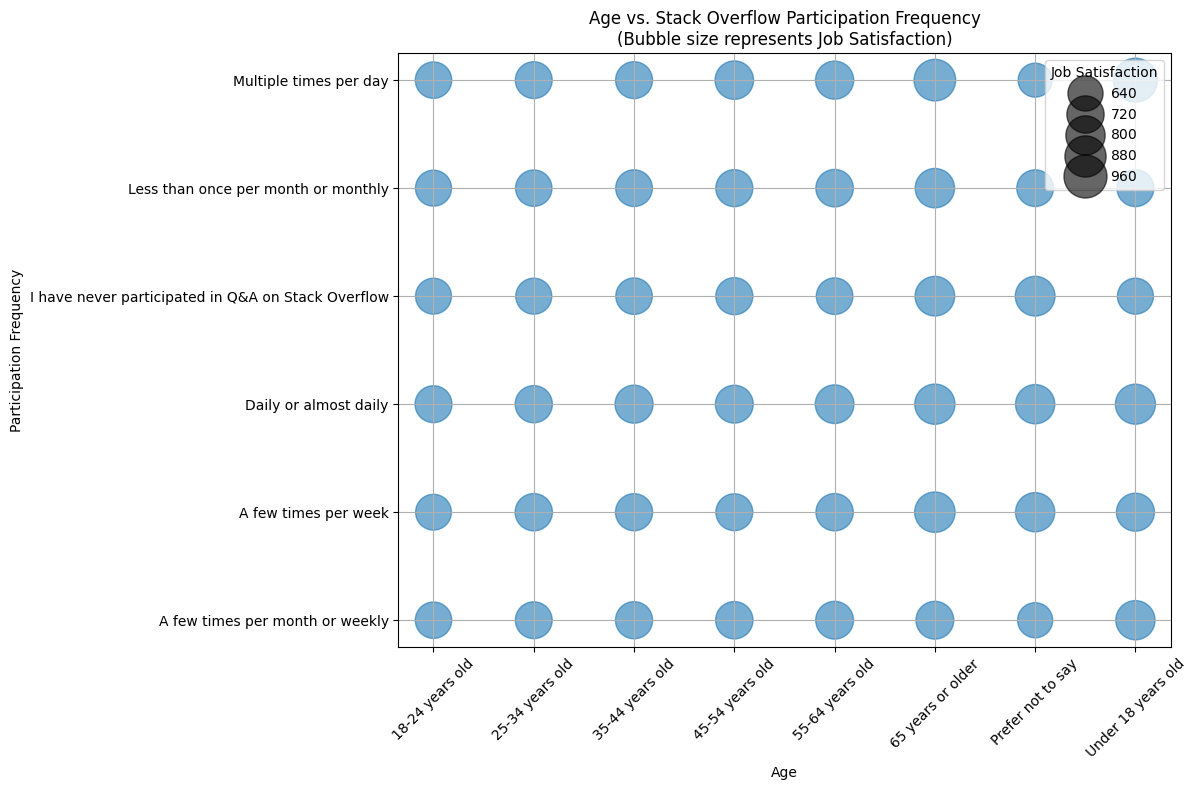

In [4]:
##Write your code here
# Task 1.1: Age vs. Frequency of Participation
age_freq = df.groupby(['Age', 'SOPartFreq']).size().reset_index(name='count')
age_freq['JobSat'] = df.groupby(['Age', 'SOPartFreq'])['JobSat'].mean().values


plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=age_freq['Age'],
    y=age_freq['SOPartFreq'],
    s=age_freq['JobSat'] * 100,  
    alpha=0.6
)

plt.title('Age vs. Stack Overflow Participation Frequency\n(Bubble size represents Job Satisfaction)')
plt.xlabel('Age')
plt.ylabel('Participation Frequency')
plt.xticks(rotation=45)
plt.grid(True)


plt.legend(*scatter.legend_elements("sizes", num=5),
          title="Job Satisfaction",
          loc="upper right")

plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


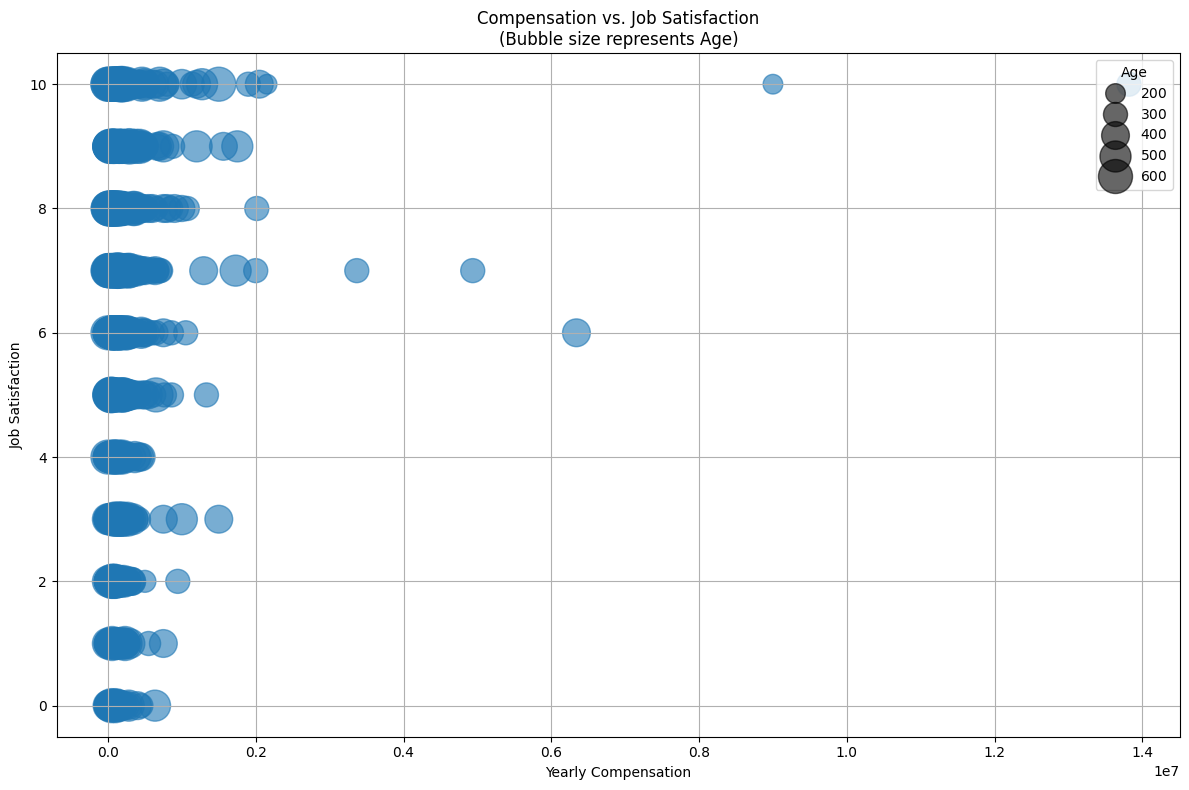

In [5]:
##Write your code here
# Task 1.2: Compensation vs. Job Satisfaction

comp_sat = df.groupby(['ConvertedCompYearly', 'JobSat']).size().reset_index(name='count')
comp_sat['Age_numeric'] = df.groupby(['ConvertedCompYearly', 'JobSat'])['Age_numeric'].mean().values


plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=comp_sat['ConvertedCompYearly'],
    y=comp_sat['JobSat'],
    s=comp_sat['Age_numeric'] * 10,  
    alpha=0.6
)

plt.title('Compensation vs. Job Satisfaction\n(Bubble size represents Age)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.grid(True)


plt.legend(*scatter.legend_elements("sizes", num=5),
          title="Age",
          loc="upper right")

plt.tight_layout()
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



In [19]:
!pip install seaborn

/tmp/ipykernel_988/1284199012.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age_numeric'].fillna(df['Age_numeric'].mean(), inplace=True)


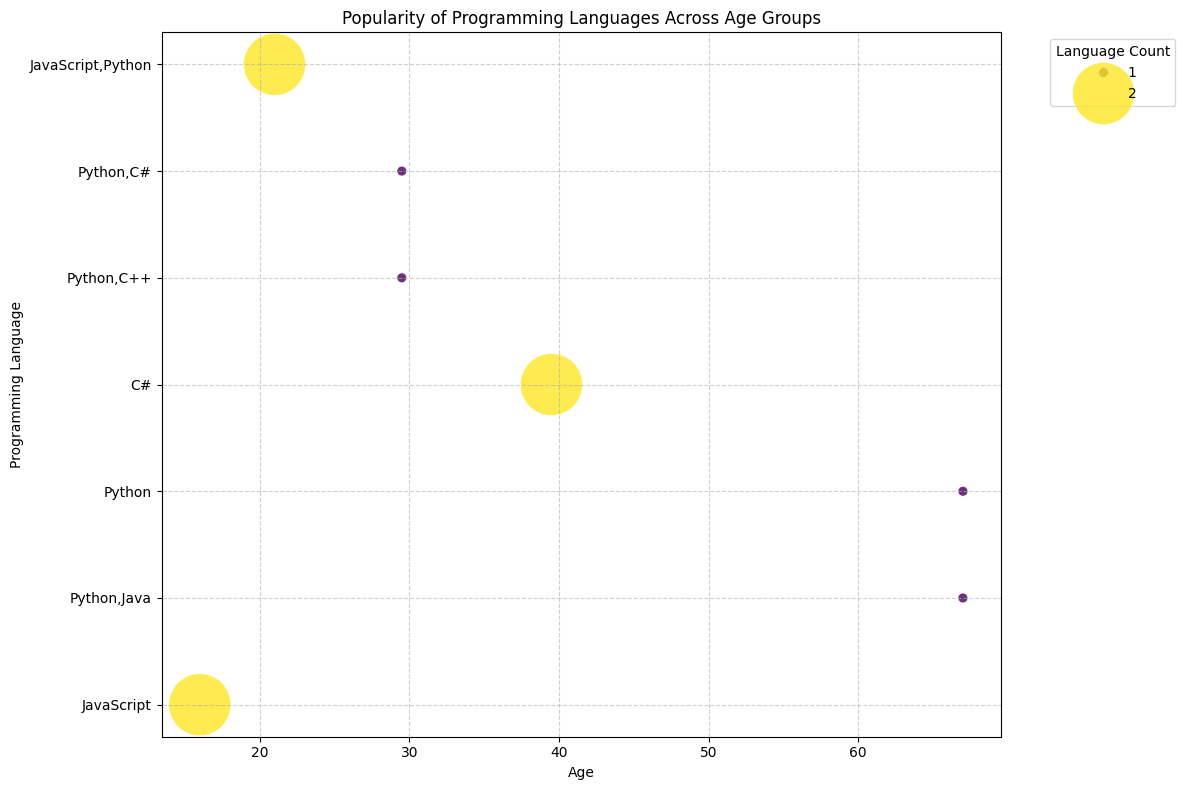

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def convert_age_to_numeric(age_str):
    """
    Converts age ranges to a numeric value.

    Args:
        age_str (str): The age range string (e.g., '18-24 years old').

    Returns:
        int or None: The numeric representation of the age, or None if the input is invalid.
                     Returns the *mean* of the age range.
    """
    if age_str == 'Under 18 years old':
        return 16
    elif age_str == '18-24 years old':
        return 21
    elif age_str == '25-34 years old':
        return 29.5
    elif age_str == '35-44 years old':
        return 39.5
    elif age_str == '45-54 years old':
        return 49.5
    elif age_str == '55-64 years old':
        return 59.5
    elif age_str == '65 years or older':
        return 67
    else:
        return None

# Create a sample DataFrame (replace with your actual DataFrame)
data = {
    'Age': ['18-24 years old', '25-34 years old', '35-44 years old', 'Under 18 years old', '65 years or older', '18-24 years old', '25-34 years old', '35-44 years old', 'Under 18 years old', '65 years or older'],
    'LanguageHaveWorkedWith': ['JavaScript,Python', 'Python,C#', 'C#', 'JavaScript', 'Python', 'JavaScript,Python', 'Python,C++', 'C#', 'JavaScript', 'Python,Java']
}
df = pd.DataFrame(data)


# Apply the age conversion function
df['Age_numeric'] = df['Age'].apply(convert_age_to_numeric)
df['Age_numeric'].fillna(df['Age_numeric'].mean(), inplace=True)

# 1. Prepare the data
lang_data = df[['Age', 'Age_numeric', 'LanguageHaveWorkedWith']].copy()
lang_data.dropna(inplace=True)
lang_data['LanguageHaveWorkedWith'] = lang_data['LanguageHaveWorkedWith'].astype(str)

# 2. Explode the language column
lang_split = lang_data['LanguageHaveWorkedWith'].str.split(';')
lang_exploded = lang_data.assign(Language=lang_split).explode('Language')
lang_exploded['Language'] = lang_exploded['Language'].str.strip()
lang_exploded = lang_exploded[lang_exploded['Language'] != '']

# 3. Aggregate the data: Count language usage by age
language_counts = lang_exploded.groupby(['Age', 'Age_numeric', 'Language']).size().reset_index(name='Count')

# 4. Create the bubble plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=language_counts,
    x='Age_numeric',
    y='Language',
    size='Count',
    hue='Count',
    sizes=(50, 2000),
    alpha=0.8,
    palette='viridis'
)

# 5. Customize the plot
plt.title('Popularity of Programming Languages Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Programming Language')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Language Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.



--- Generating: Bubble Plot - Preferred DB vs. Job Sat (Size=Popularity) ---
Processed 10 respondent-database preference entries.
Plotting 4 databases preferred by at least 0 respondents.


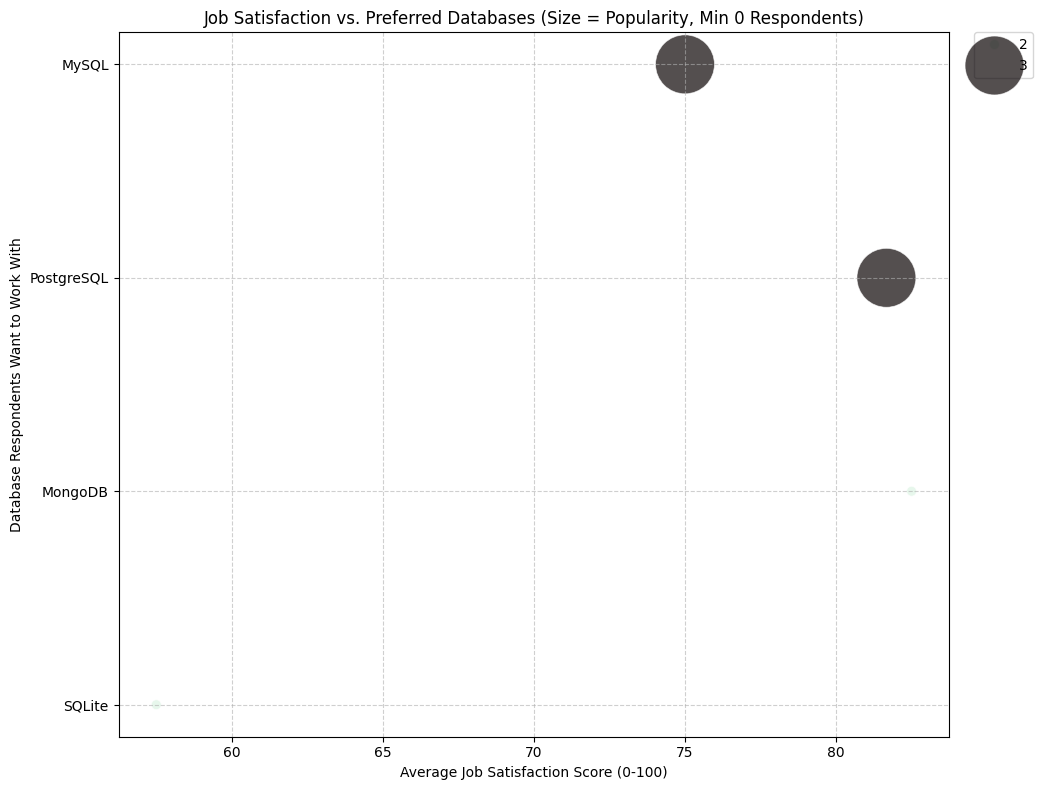

In [21]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample DataFrame (replace with your actual DataFrame)
data = {
    'DatabaseWantToWorkWith': ['MySQL', 'PostgreSQL', 'SQLite', 'MySQL', 'PostgreSQL', 'MongoDB', 'MySQL', 'PostgreSQL', 'SQLite', 'MongoDB'],
    'JobSatPoints_6': [70, 80, 60, 90, 75, 85, 65, 90, 55, 80]
}
df = pd.DataFrame(data)

# --- Bubble Plot: Preferred Databases vs. Job Satisfaction (Size=Popularity) ---
print("\n--- Generating: Bubble Plot - Preferred DB vs. Job Sat (Size=Popularity) ---")
if 'DatabaseWantToWorkWith' in df.columns and 'JobSatPoints_6' in df.columns:

    # 1. Prepare Data
    data_db_sat = df[['DatabaseWantToWorkWith', 'JobSatPoints_6']].copy()
    data_db_sat.dropna(inplace=True) # Drop rows missing satisfaction or DB preference

    # Ensure Database preference column is string type before splitting
    data_db_sat['DatabaseWantToWorkWith'] = data_db_sat['DatabaseWantToWorkWith'].astype(str)

    # 2. Explode the database preferences column
    db_split = data_db_sat['DatabaseWantToWorkWith'].str.split(';')
    db_exploded = data_db_sat.assign(Database=db_split).explode('Database')

    # Clean up database names (remove leading/trailing whitespace)
    db_exploded['Database'] = db_exploded['Database'].str.strip()
    # Filter out empty strings and potential 'nan' strings
    db_exploded = db_exploded[(db_exploded['Database'] != '') & (db_exploded['Database'].str.lower() != 'nan')]
    print(f"Processed {len(db_exploded)} respondent-database preference entries.")


    # 3. Aggregate Data: Calculate Avg Satisfaction and Count (Popularity) per Database
    db_stats = db_exploded.groupby('Database')['JobSatPoints_6'].agg(
        AvgSatisfaction='mean',
        RespondentCount='count' # This count will be the bubble size
    ).reset_index()


    # 4. Filter for Databases with minimum respondent count for clarity
    min_respondents_threshold = 0 # Adjust as needed.  Set to 0 to include all.
    db_stats_filtered = db_stats[db_stats['RespondentCount'] >= min_respondents_threshold].copy()
    db_stats_filtered.sort_values(by='RespondentCount', ascending=False, inplace=True) # Sort for potential y-axis order
    print(f"Plotting {len(db_stats_filtered)} databases preferred by at least {min_respondents_threshold} respondents.")


    # 5. Create the Bubble Plot
    plt.figure(figsize=(12, 8)) # Adjust figsize for potentially many databases
    bubble_plot = sns.scatterplot(
        data=db_stats_filtered,
        x='AvgSatisfaction',     # Average satisfaction on x-axis
        y='Database',            # Database name on y-axis
        size='RespondentCount',  # Bubble size indicates popularity (respondent count)
        hue='RespondentCount',   # Optional: Color also indicates popularity
        palette='mako_r',        # Example palette (reversed mako)
        sizes=(50, 1800),        # Range of bubble sizes
        alpha=0.7,
        legend='brief'           # Try a brief legend for size/hue
    )


    # 6. Customize Plot
    plt.title(f'Job Satisfaction vs. Preferred Databases (Size = Popularity, Min {min_respondents_threshold} Respondents)')
    plt.xlabel('Average Job Satisfaction Score (0-100)')
    plt.ylabel('Database Respondents Want to Work With')
    plt.grid(True, linestyle='--', alpha=0.6)
    # Adjust y-axis tick label size if too crowded
    # plt.yticks(fontsize=9)

    # Position legend
    plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

    plt.tight_layout(rect=[0, 0, 0.88, 1]) # Adjust layout for legend
    plt.show()
else:
    print("Bubble plot skipped: Required columns 'DatabaseWantToWorkWith' or 'JobSatPoints_6' not found.")


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.



--- Generating: Bubble Plot - Compensation Across Developer Roles ---


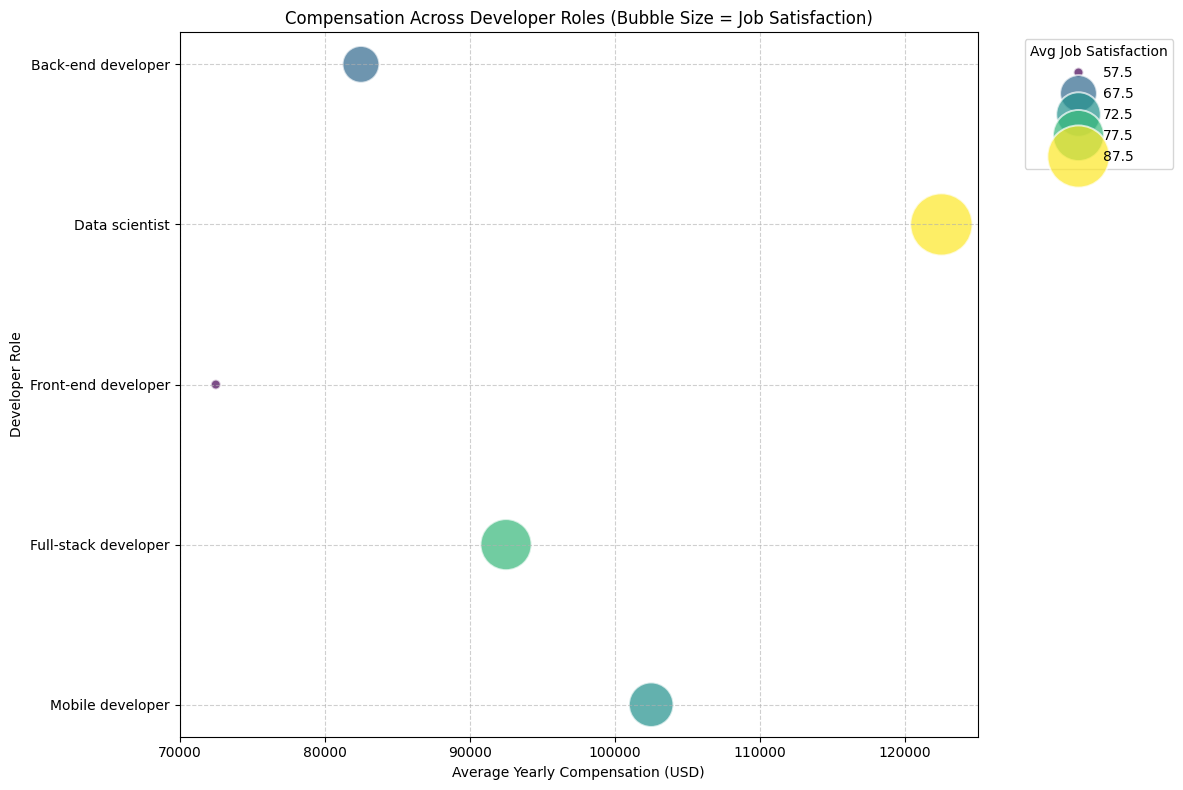

In [23]:
##Write your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample DataFrame (replace with your actual DataFrame)
data = {
    'DevType': ['Back-end developer', 'Front-end developer', 'Full-stack developer', 'Mobile developer', 'Data scientist', 'Back-end developer', 'Front-end developer', 'Full-stack developer', 'Mobile developer', 'Data scientist'],
    'ConvertedCompYearly': [80000, 70000, 90000, 100000, 120000, 85000, 75000, 95000, 105000, 125000],
    'JobSatPoints_6': [70, 60, 80, 75, 90, 65, 55, 75, 70, 85]
}
df = pd.DataFrame(data)

# --- Bubble Plot: Compensation Across Developer Roles ---
print("\n--- Generating: Bubble Plot - Compensation Across Developer Roles ---")
if 'DevType' in df.columns and 'ConvertedCompYearly' in df.columns and 'JobSatPoints_6' in df.columns:
    # 1. Prepare the data
    data_role_comp_sat = df[['DevType', 'ConvertedCompYearly', 'JobSatPoints_6']].copy()
    data_role_comp_sat.dropna(inplace=True)

    # Ensure DevType is a string
    data_role_comp_sat['DevType'] = data_role_comp_sat['DevType'].astype(str)

    # Split the 'DevType' column (if necessary) and explode it.  This handles cases where a respondent lists multiple roles.
    data_role_comp_sat['DevType'] = data_role_comp_sat['DevType'].str.split(';')
    role_exploded = data_role_comp_sat.explode('DevType')
    role_exploded['DevType'] = role_exploded['DevType'].str.strip()  # Clean up

    # 2. Aggregate the data: Calculate average compensation and average job satisfaction for each role
    role_stats = role_exploded.groupby('DevType').agg(
        AvgCompensation=('ConvertedCompYearly', 'mean'),
        AvgJobSatisfaction=('JobSatPoints_6', 'mean'),
        RespondentCount=('DevType', 'count')  # Get a count of respondents for each role.
    ).reset_index()


    # 3. Create the bubble plot
    plt.figure(figsize=(12, 8))
    bubble_plot = sns.scatterplot(
        data=role_stats,
        x='AvgCompensation',
        y='DevType',
        size='AvgJobSatisfaction',  # Bubble size represents average job satisfaction
        hue='AvgJobSatisfaction',
        sizes=(50, 2000),
        alpha=0.7,
        palette='viridis'
    )

    # 4. Customize the plot
    plt.title('Compensation Across Developer Roles (Bubble Size = Job Satisfaction)')
    plt.xlabel('Average Yearly Compensation (USD)')
    plt.ylabel('Developer Role')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title='Avg Job Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Bubble plot skipped: Required columns 'DevType', 'ConvertedCompYearly', and 'JobSatPoints_6' not found in the DataFrame.")


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


/tmp/ipykernel_988/4094585258.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age_numeric'].fillna(df['Age_numeric'].mean(), inplace=True)



--- Generating: Bubble Plot - Collaboration Tools by Age ---


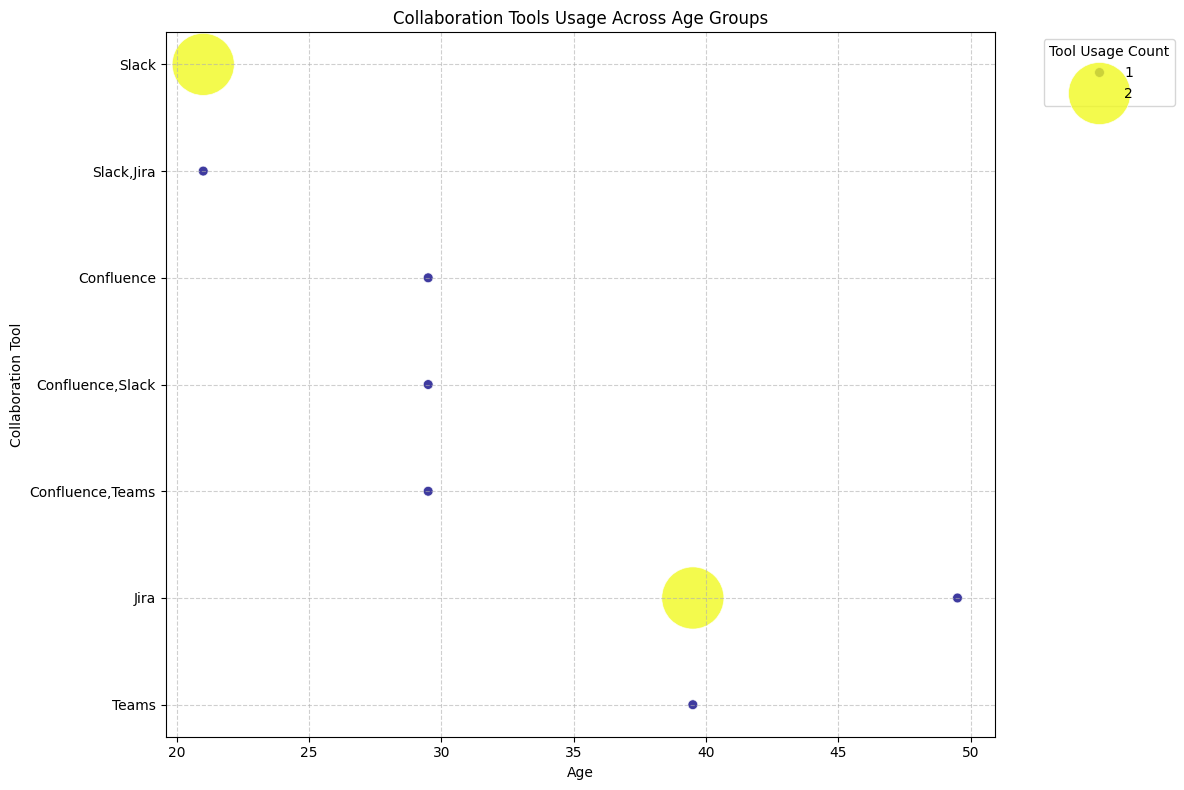

In [24]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def convert_age_to_numeric(age_str):
    """
    Converts age ranges to a numeric value.

    Args:
        age_str (str): The age range string (e.g., '18-24 years old').

    Returns:
        int or None: The numeric representation of the age, or None if the input is invalid.
                     Returns the *mean* of the age range.
    """
    if age_str == 'Under 18 years old':
        return 16
    elif age_str == '18-24 years old':
        return 21
    elif age_str == '25-34 years old':
        return 29.5
    elif age_str == '35-44 years old':
        return 39.5
    elif age_str == '45-54 years old':
        return 49.5
    elif age_str == '55-64 years old':
        return 59.5
    elif age_str == '65 years or older':
        return 67
    else:
        return None

# Create a sample DataFrame (replace with your actual DataFrame)
data = {
    'Age': ['18-24 years old', '25-34 years old', '35-44 years old', '18-24 years old', '25-34 years old', '35-44 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old'],
    'NEWCollabToolsHaveWorkedWith': ['Slack,Jira', 'Confluence,Slack', 'Jira', 'Slack', 'Confluence,Teams', 'Jira', 'Slack', 'Confluence', 'Teams', 'Jira']
}
df = pd.DataFrame(data)

# Apply the age conversion function
df['Age_numeric'] = df['Age'].apply(convert_age_to_numeric)
df['Age_numeric'].fillna(df['Age_numeric'].mean(), inplace=True)

# --- Bubble Plot: Collaboration Tools by Age ---
print("\n--- Generating: Bubble Plot - Collaboration Tools by Age ---")
if 'NEWCollabToolsHaveWorkedWith' in df.columns and 'Age_numeric' in df.columns:
    # 1. Prepare the data
    data_collab_age = df[['Age', 'Age_numeric', 'NEWCollabToolsHaveWorkedWith']].copy()
    data_collab_age.dropna(inplace=True)

    # Ensure the collaboration tools column is a string
    data_collab_age['NEWCollabToolsHaveWorkedWith'] = data_collab_age['NEWCollabToolsHaveWorkedWith'].astype(str)

    # 2. Explode the collaboration tools column
    collab_split = data_collab_age['NEWCollabToolsHaveWorkedWith'].str.split(';')
    collab_exploded = data_collab_age.assign(Tool=collab_split).explode('Tool')
    collab_exploded['Tool'] = collab_exploded['Tool'].str.strip()  # Clean up

    # Remove empty strings
    collab_exploded = collab_exploded[collab_exploded['Tool'] != '']

    # 3. Aggregate the data: Count tool usage by age
    tool_counts = collab_exploded.groupby(['Age', 'Age_numeric', 'Tool']).size().reset_index(name='Count')

    # 4. Create the bubble plot
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=tool_counts,
        x='Age_numeric',
        y='Tool',
        size='Count',
        hue='Count',
        sizes=(50, 2000),
        alpha=0.8,
        palette='plasma'
    )

    # 5. Customize the plot
    plt.title('Collaboration Tools Usage Across Age Groups')
    plt.xlabel('Age')
    plt.ylabel('Collaboration Tool')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title='Tool Usage Count', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Bubble plot skipped: Required columns 'NEWCollabToolsHaveWorkedWith' and 'Age_numeric' not found in the DataFrame.")


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.




--- Generating: Bubble Plot - Web Frameworks vs. Job Satisfaction ---


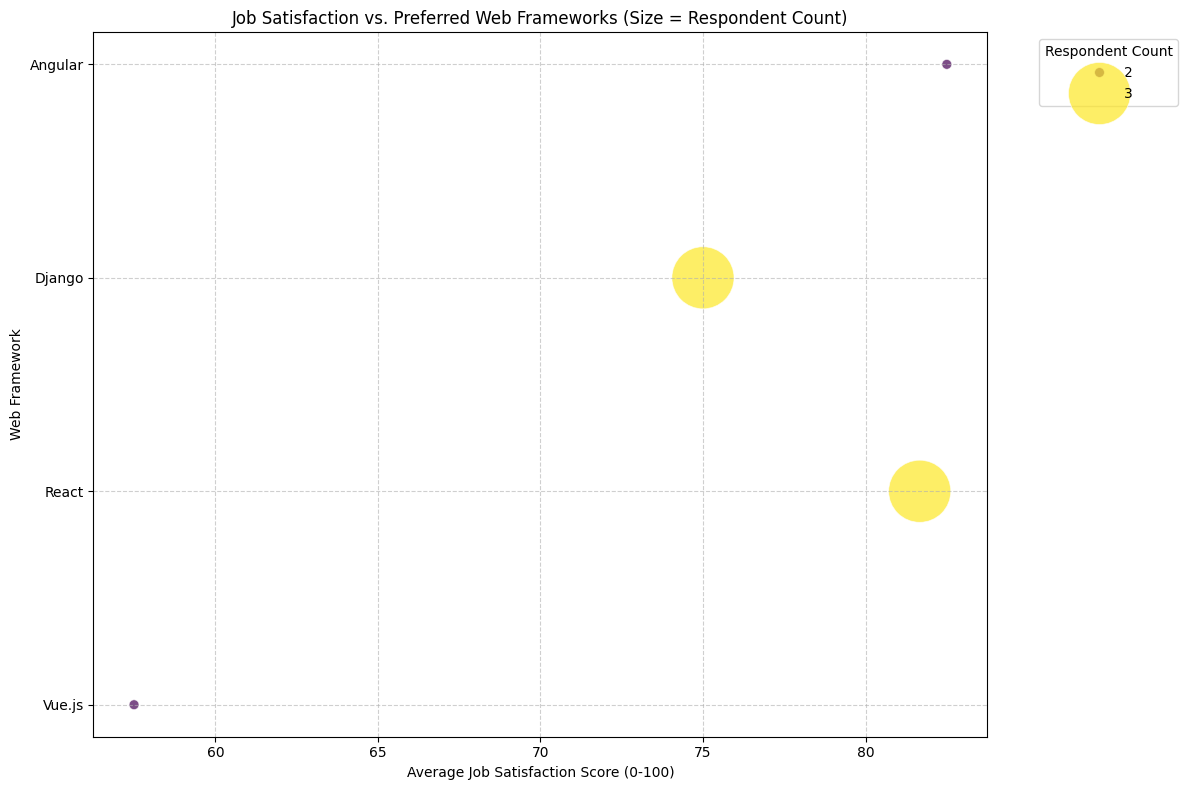

In [25]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample DataFrame (replace with your actual DataFrame)
data = {
    'WebframeWantToWorkWith': ['Django', 'React', 'Vue.js', 'Django', 'React', 'Angular', 'Django', 'React', 'Vue.js', 'Angular'],
    'JobSatPoints_6': [70, 80, 60, 90, 75, 85, 65, 90, 55, 80]
}
df = pd.DataFrame(data)

# --- Bubble Plot: Preferred Web Frameworks vs. Job Satisfaction ---
print("\n--- Generating: Bubble Plot - Web Frameworks vs. Job Satisfaction ---")
if 'WebframeWantToWorkWith' in df.columns and 'JobSatPoints_6' in df.columns:
    # 1. Prepare the data
    data_web_sat = df[['WebframeWantToWorkWith', 'JobSatPoints_6']].copy()
    data_web_sat.dropna(inplace=True)

    # Ensure WebframeWantToWorkWith is a string
    data_web_sat['WebframeWantToWorkWith'] = data_web_sat['WebframeWantToWorkWith'].astype(str)

    # 2. Explode the web framework preferences
    web_split = data_web_sat['WebframeWantToWorkWith'].str.split(';')
    web_exploded = data_web_sat.assign(WebFramework=web_split).explode('WebFramework')
    web_exploded['WebFramework'] = web_exploded['WebFramework'].str.strip()  # Clean up

    # Remove empty strings
    web_exploded = web_exploded[web_exploded['WebFramework'] != '']

    # 3. Aggregate the data: Calculate average satisfaction and respondent count
    web_stats = web_exploded.groupby('WebFramework').agg(
        AvgSatisfaction=('JobSatPoints_6', 'mean'),
        RespondentCount=('WebFramework', 'count')
    ).reset_index()

    # 4. Create the bubble plot
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=web_stats,
        x='AvgSatisfaction',
        y='WebFramework',
        size='RespondentCount',
        hue='RespondentCount',
        sizes=(50, 2000),
        alpha=0.7,
        palette='viridis'
    )

    # 5. Customize the plot
    plt.title('Job Satisfaction vs. Preferred Web Frameworks (Size = Respondent Count)')
    plt.xlabel('Average Job Satisfaction Score (0-100)')
    plt.ylabel('Web Framework')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title='Respondent Count', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Bubble plot skipped: Required columns 'WebframeWantToWorkWith' and 'JobSatPoints_6' not found in the DataFrame.")


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.




--- Generating: Bubble Plot - Admired Technologies Across Countries ---


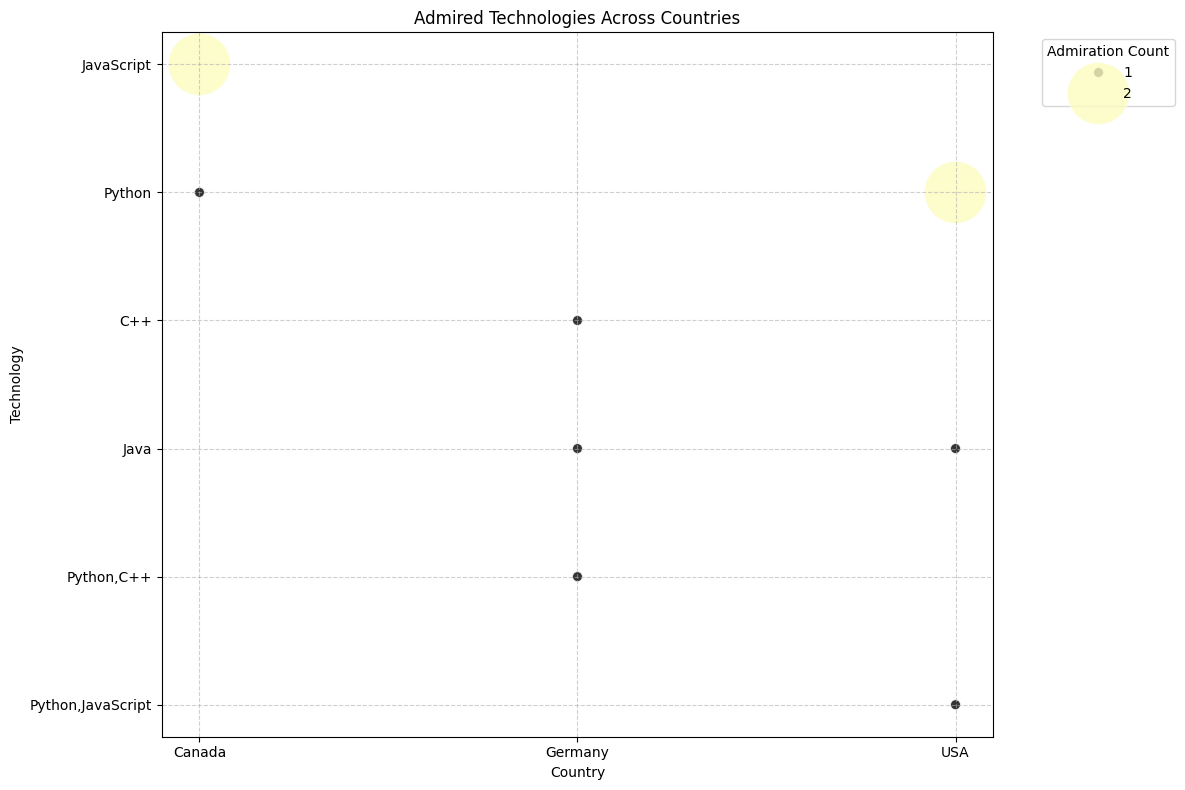

In [26]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample DataFrame (replace with your actual DataFrame)
data = {
    'Country': ['USA', 'Canada', 'USA', 'Germany', 'Canada', 'USA', 'Germany', 'USA', 'Canada', 'Germany'],
    'LanguageAdmired': ['Python,JavaScript', 'Python', 'Java', 'Python,C++', 'JavaScript', 'Python', 'Java', 'Python', 'JavaScript', 'C++']
}
df = pd.DataFrame(data)

# --- Bubble Plot: Admired Technologies Across Countries ---
print("\n--- Generating: Bubble Plot - Admired Technologies Across Countries ---")
if 'LanguageAdmired' in df.columns and 'Country' in df.columns:
    # 1. Prepare the data
    data_tech_country = df[['Country', 'LanguageAdmired']].copy()
    data_tech_country.dropna(inplace=True)

    # Ensure Country and LanguageAdmired are strings
    data_tech_country['Country'] = data_tech_country['Country'].astype(str)
    data_tech_country['LanguageAdmired'] = data_tech_country['LanguageAdmired'].astype(str)

    # 2. Explode the admired technologies column
    tech_split = data_tech_country['LanguageAdmired'].str.split(';')
    tech_exploded = data_tech_country.assign(Technology=tech_split).explode('Technology')
    tech_exploded['Technology'] = tech_exploded['Technology'].str.strip()  # Clean up

    # Remove empty strings
    tech_exploded = tech_exploded[tech_exploded['Technology'] != '']

    # 3. Aggregate the data: Count technology admiration by country
    tech_counts = tech_exploded.groupby(['Country', 'Technology']).size().reset_index(name='Count')

    # 4. Create the bubble plot
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=tech_counts,
        x='Country',
        y='Technology',
        size='Count',
        hue='Count',
        sizes=(50, 2000),
        alpha=0.8,
        palette='magma'
    )

    # 5. Customize the plot
    plt.title('Admired Technologies Across Countries')
    plt.xlabel('Country')
    plt.ylabel('Technology')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title='Admiration Count', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Bubble plot skipped: Required columns 'LanguageAdmired' and 'Country' not found in the DataFrame.")


## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
